## Project1_Aviation_Risk_Analysis
# Business Understanding

Problem Statement:
The company plans to purchase and operate aircraft for commercial and private use but lacks knowledge about historical safety risks. Investing in high-risk aircraft could lead to financial loss, reputational damage, or regulatory issues.

Objectives:
- Identify aircraft types with the lowest historical accident rates.
- Analyze trends in aviation accidents over time.
- Evaluate factors contributing to higher accident risk.
- Provide actionable recommendations for safer aircraft investment decisions.

Data Understanding
- Data from the National Transportation Safety Board (1962–2023).
- Includes accident details, aircraft info, injuries, investigation types, and operational data.
- Data cleaning included: handling missing values, removing duplicates, fixing incorrect date entries, and converting relevant columns to categorical or numerical types.

1. Importing Required Libraries
- We start by importing the essential Python libraries for data analysis and visualization.


In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2. Loading the Dataset

- The dataset contains aviation accident data from 1962 to 2023.
- Let’s load it and check the basic structure.

In [276]:
#read data

aviation_data = pd.read_csv("Aviation_Data.csv")

#basic overview
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


3. Dataset Overview

- We’ll check the shape, columns, and data types to understand what the dataset looks like.

In [277]:
aviation_data.shape

(90348, 31)

In [278]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [279]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

4. Checking for Missing Values

- To identify data quality issues, we calculate the number and percentage of missing values in each column.

In [280]:
aviation_data.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [281]:
missing_percentage = (aviation_data.isnull().sum() / len(aviation_data)) * 100

missing_percentage.sort_values(ascending=False).head(20)

Schedule                  86.073848
Air.carrier               81.573471
FAR.Description           64.555939
Aircraft.Category         64.263736
Longitude                 61.954886
Latitude                  61.944924
Airport.Code              44.512330
Airport.Name              41.665560
Broad.phase.of.flight     31.681941
Publication.Date          18.471909
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Fatal.Injuries      14.233851
Engine.Type                9.468942
Report.Status              8.680878
Purpose.of.flight          8.468367
Number.of.Engines          8.348829
Total.Uninjured            8.158454
Weather.Condition          6.586753
Aircraft.damage            5.150086
dtype: float64

In [282]:

aviation_data = aviation_data.drop(["Schedule", "Air.carrier", "FAR.Description", "Airport.Code", "Longitude", "Latitude", "Airport.Name", "Publication.Date"], axis=1, errors='ignore')

print("New Shape:", aviation_data.shape)
aviation_data.head()

New Shape: (90348, 23)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


6. Handling Missing Values in Categorical Columns

- For categorical data, missing values are replaced with “Unknown”.

In [283]:

category_columns = ["Make", "Model", "Injury.Severity", "Aircraft.damage", "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight", "Report.Status",
"Registration.Number", "Amateur.Built", "Location", "Country", "Aircraft.Category", "Accident.Number", "Event.Id"]

aviation_data[category_columns] = aviation_data[category_columns].fillna("Unknown")

In [284]:
number_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"]

summary = aviation_data[number_columns].agg(['mean', 'median']).T
summary['mode'] = aviation_data[number_columns].mode().iloc[0]
print(summary)

                            mean  median  mode
Total.Fatal.Injuries    0.647855     0.0   0.0
Total.Serious.Injuries  0.279881     0.0   0.0
Total.Minor.Injuries    0.357061     0.0   0.0
Total.Uninjured         5.325440     1.0   0.0
Number.of.Engines       1.146585     1.0   1.0


7. Handling Missing Values in Numerical Columns

- For numeric features, we replace missing values with zero (or one where relevant).
- We also check summary statistics (mean, median, and mode) to understand their distributions.

In [285]:
number_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
number_columns2 = ["Number.of.Engines"]

aviation_data[number_columns] = aviation_data[number_columns].fillna(0)
aviation_data[number_columns2] = aviation_data[number_columns2].fillna(1)



8. Removing Duplicates

- We check and remove duplicate entries to ensure data integrity

In [286]:
aviation_data.duplicated().sum()

np.int64(1390)

In [287]:
aviation_data = aviation_data.drop_duplicates()

9. Fixing Inconsistent or Misplaced Data

- We discovered that some dates were mistakenly stored under the Investigation.Type column.
- We replace those date-like values with “Unknown” and correctly format Event.Date.
- Cleaning Event.Date ensures we can perform accurate time-based analyses in later steps.

In [288]:
aviation_data["Investigation.Type"].unique()

array(['Accident', 'Incident', '25-09-2020', '14-06-2021', '03-11-2020',
       '24-02-2021', '02-02-2021', '05-05-2021', '03-12-2020',
       '07-12-2020', '06-05-2021', '19-11-2020', '04-08-2021',
       '13-09-2021', '10-06-2021', '14-12-2021', '08-06-2021',
       '24-06-2021', '24-08-2021', '31-03-2021', '27-05-2021',
       '20-05-2021', '18-11-2020', '25-05-2021', '01-06-2021',
       '15-07-2021', '15-10-2021', '26-09-2020', '03-06-2021',
       '29-09-2021', '28-01-2021', '20-10-2021', '11-12-2020',
       '11-02-2021', '13-12-2021', '06-01-2021', '31-08-2021',
       '04-03-2021', '05-04-2021', '26-01-2021', '29-01-2021',
       '26-08-2021', '08-11-2021', '20-08-2021', '05-01-2021',
       '22-09-2021', '20-09-2021', '16-07-2021', '19-10-2021',
       '16-11-2021', '17-12-2021', '14-06-2022', '22-06-2022',
       '13-10-2022', '03-11-2022', '13-07-2022', '05-07-2022',
       '01-09-2022', '12-08-2022', '08-09-2022', '22-09-2022',
       '01-11-2022', '01-07-2022', '20-07-202

In [289]:
aviation_data["Investigation.Type"] = aviation_data["Investigation.Type"].replace(r"\d{2}-\d{2}-\d{4}", "Unknown", regex=True)



In [290]:
# Keep Event.Date clean (datetime with NaT)
aviation_data["Event.Date"] = pd.to_datetime(aviation_data["Event.Date"], errors="coerce")

# Optional helper for grouping/plotting "Unknown"
aviation_data["Event.Date_Flag"] = aviation_data["Event.Date"].dt.strftime("%Y-%m-%d")
aviation_data["Event.Date_Flag"] = aviation_data["Event.Date_Flag"].fillna("Unknown")



In [291]:
aviation_data.shape

(88958, 24)

In [292]:
type_accidents = aviation_data.groupby('Aircraft.Category').size()
print(type_accidents)

Aircraft.Category
Airplane             27617
Balloon                231
Blimp                    4
Glider                 508
Gyrocraft              173
Helicopter            3440
Powered Parachute       91
Powered-Lift             5
Rocket                   1
ULTR                     1
UNK                      2
Ultralight              30
Unknown              56685
WSFT                     9
Weight-Shift           161
dtype: int64


# Exploratory Data Analysis (EDA)


### Objective 1: Identify Low-Risk Aircraft
This analysis shows the top 10 aircraft makes and models most involved in accidents, 
helping identify higher-risk aircraft and guiding safer investment decisions.


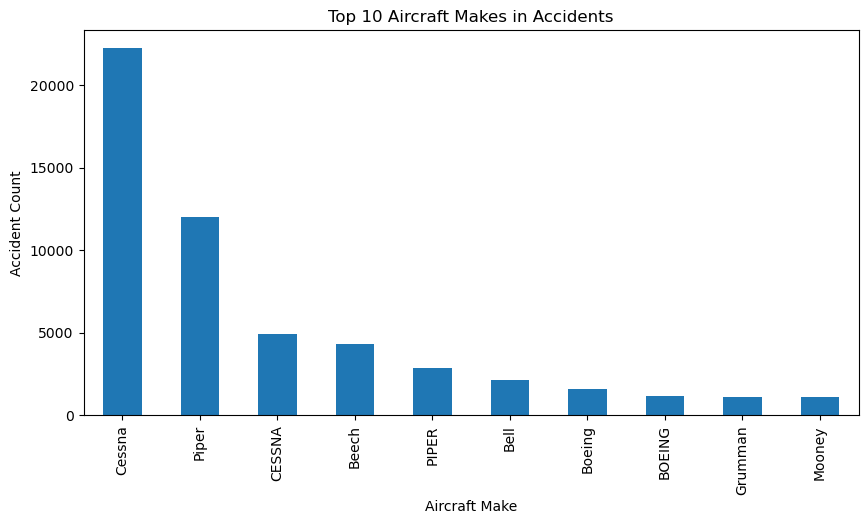

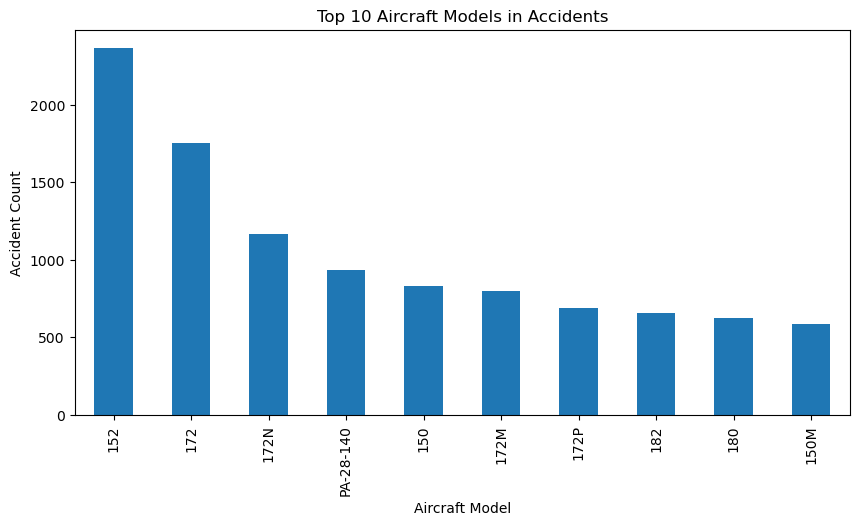

In [293]:
# Top 10 Aircraft Makes
aviation_data["Make"].value_counts().head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Aircraft Makes in Accidents")
plt.xlabel("Aircraft Make")
plt.ylabel("Accident Count")
plt.show()

# Top 10 Aircraft Models
aviation_data["Model"].value_counts().head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Aircraft Models in Accidents")
plt.xlabel("Aircraft Model")
plt.ylabel("Accident Count")
plt.show()



- Major Investigation types

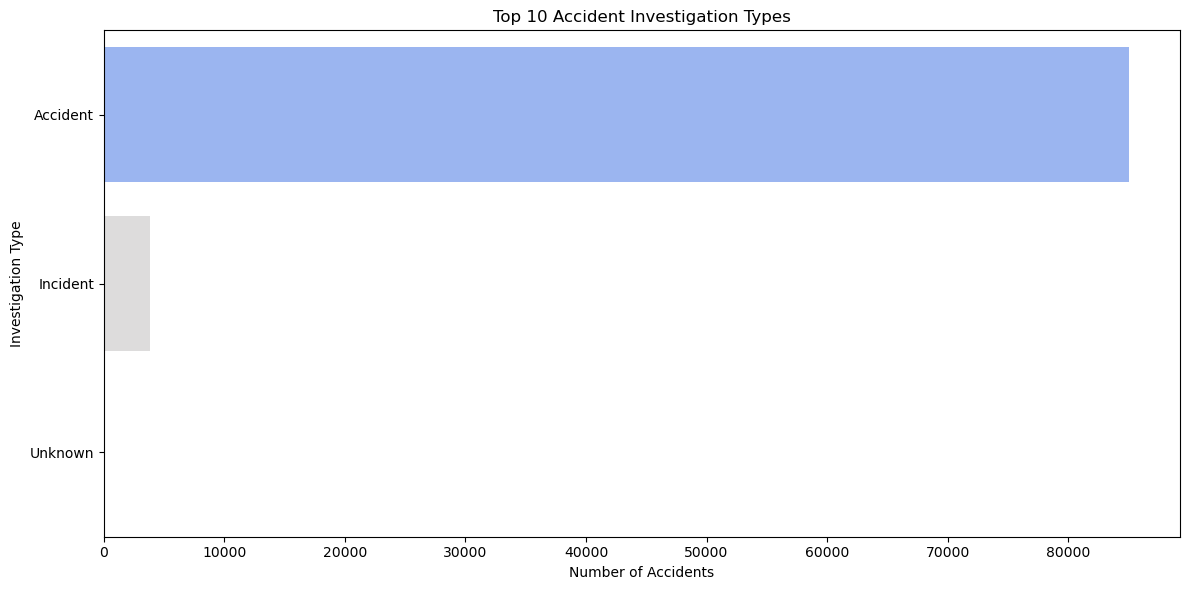

In [294]:
plt.figure(figsize=(12,6))
sns.countplot(data=aviation_data, y="Investigation.Type", order=aviation_data['Investigation.Type'].value_counts().index[:10], palette="coolwarm")
plt.title("Top 10 Accident Investigation Types")
plt.xlabel("Number of Accidents")
plt.ylabel("Investigation Type")
plt.tight_layout()
plt.show()

## Objective 2: Analyze Trends in Aviation Accidents

- This analysis shows how total injuries per year (1980+) vary by severity, highlighting trends in aviation safety and helping identify safer periods for aircraft operations.


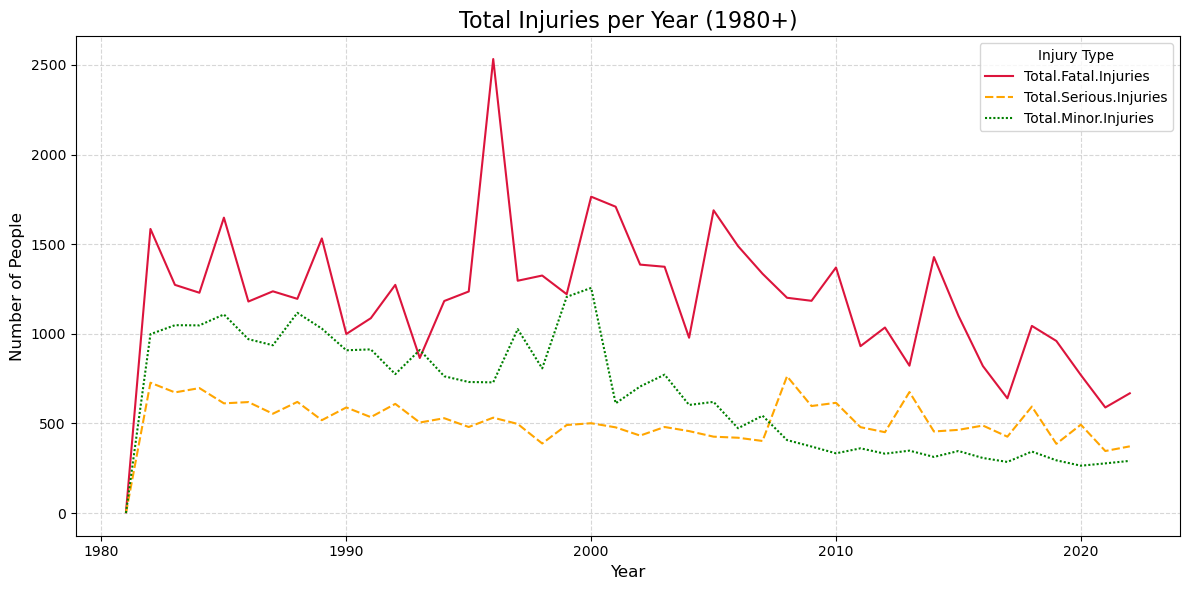

In [295]:
# Filter for years 1980 and above
aviation_data_filtered = aviation_data[aviation_data['Event.Date'].dt.year >= 1980]

# Aggregate total injuries per year (1980+)
injuries_year = aviation_data_filtered.groupby(aviation_data_filtered['Event.Date'].dt.year)[
    ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]
].sum()

# Plot line graph
plt.figure(figsize=(12,6))
sns.lineplot(data=injuries_year, palette=["crimson", "orange", "green", "blue"])
plt.title("Total Injuries per Year (1980+)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.legend(title="Injury Type")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




### Objective 3: Evaluate Factors Contributing to Higher Risk

- This analysis shows the number of accidents in each phase of flight, highlighting which stages are most accident-prone. 
- It helps identify **operational risk areas** and informs safer aircraft operation and investment decisions.


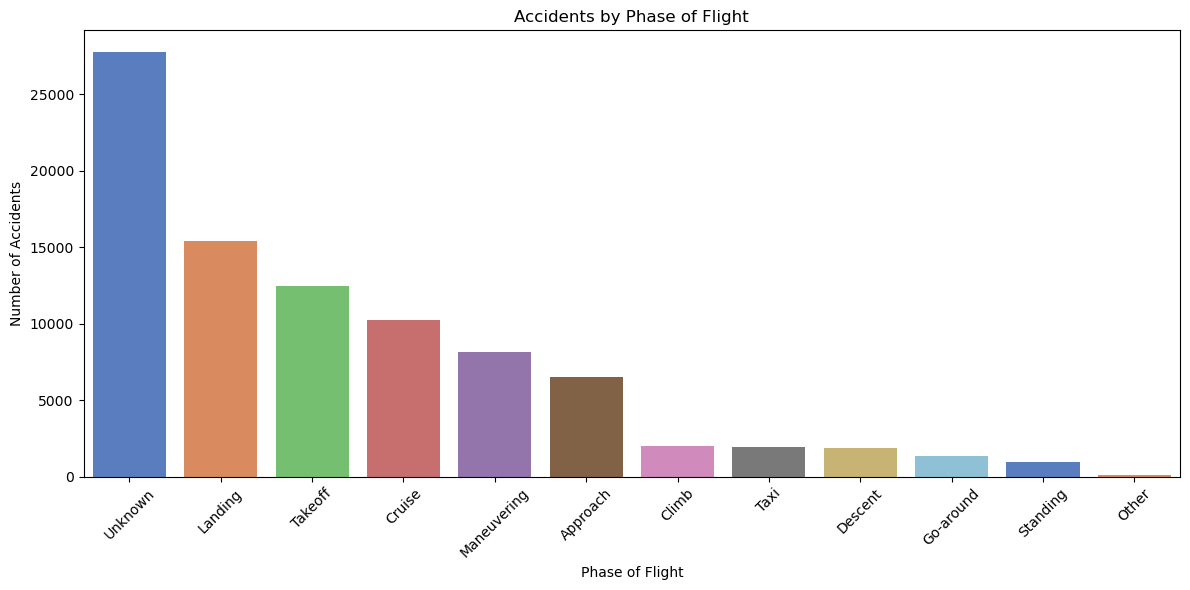

In [296]:
plt.figure(figsize=(12,6))
phase_counts = aviation_data['Broad.phase.of.flight'].value_counts()
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette="muted")
plt.title("Accidents by Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()